# DATA ASSIGNMENT

<img src="Ian_Assignment/cover.png",width=170,height=170 align = 'left'>

This assignment was done to explore various methods of modelling a given set of data in order to predict one target variable from a possible set of nine features.  The document was split into the following sections:
1.  Importing libraries and overview of data
2.  Data wrangeling
3.  Machine learning
4.  General observations and consclusions


## 1.  Importing libraries and overview of data

### 1.1. Importing libraries

In [1]:
####################
## Data handeling ##
####################
import pandas as pd 
from collections import Counter
import warnings

#########################
## General Mathematics ##
#########################
import numpy as np 
from statistics import mode,median,mean

###################
## Visualisation ##
###################
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

##################
## ML Libraries ##
##################
import sklearn      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

###########
## Misc. ##
###########
warnings.filterwarnings('ignore')
import timeit

### 1.2. Importing data

In [2]:
##################################################
## Import dataset and split into train and test ##
##################################################

File_Import_Name ='C:/Users/Abil083.D_ABSA/Desktop/Ian_Assignment/Blu.csv'

df = pd.read_csv(File_Import_Name)
test_percentage = 0.3
train_data, test_data = train_test_split(df, test_size=test_percentage)
print("The total number of rows in training set is: ",len(train_data), "for a training size of ",test_percentage*100,"%") #916
train_data.head(10)

The total number of rows in training set is:  916 for a training size of  30.0 %


,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
887,1,8.1125,0,0,NaN,pink,NaN,3,sigma,129.838206
1034,1,15.2458,1,1,NaN,pink,NaN,3,gamma,52.765767
350,1,39.0000,2,0,NaN,blue,15.0000,2,sigma,174.564232
731,0,7.8958,0,0,NaN,pink,19.0000,3,sigma,83.567505
763,1,20.5750,2,1,NaN,blue,0.1667,3,sigma,181.909796
758,1,17.4000,0,1,NaN,pink,36.5000,3,sigma,16.069164
1027,0,8.0500,0,0,NaN,pink,NaN,3,sigma,122.546081
917,1,13.4167,1,0,NaN,pink,39.0000,3,gamma,98.167310
402,1,13.8583,0,1,NaN,blue,30.0000,2,gamma,148.575587
146,1,76.7292,0,1,descrates-44,blue,49.0000,1,gamma,206.546035


### 1.3. Types of data

In [3]:
train_data.describe()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9
count,916.000000,915.000000,916.000000,916.000000,736.000000,916.000000,916.000000
mean,0.364629,33.281380,0.378821,0.504367,30.423687,2.280568,102.582783
std,0.481589,51.462284,0.895373,1.044885,14.395067,0.838222,49.785085
min,0.000000,0.000000,0.000000,0.000000,0.166700,1.000000,-57.341836
25%,0.000000,7.895800,0.000000,0.000000,21.000000,1.750000,69.705792
50%,0.000000,14.458300,0.000000,0.000000,29.000000,3.000000,102.366012
75%,1.000000,31.137500,0.000000,1.000000,39.000000,3.000000,134.905818
max,1.000000,512.329200,9.000000,8.000000,74.000000,3.000000,264.692290


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 887 to 364
Data columns (total 10 columns):
target_var    916 non-null int64
feature_1     915 non-null float64
feature_2     916 non-null int64
feature_3     916 non-null int64
feature_4     200 non-null object
feature_5     916 non-null object
feature_6     736 non-null float64
feature_7     916 non-null int64
feature_8     915 non-null object
feature_9     916 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.7+ KB


From the above information the following may be observed:
    - Feature 1: Integer
    - Feature 2: Float
    - Feature 3: Integer
    - Feature 4: Object
    - Feature 5: Object
    - Feature 6: Flat
    - Feature 7: Integer
    - Feature 8: Object 
    - Feature 9: Float

### 1.4. Data overview

There are a number of aspects to consider when viewing this particular dataset.  The first one is dealing with missing data.

In [5]:
Number_of_Rows = len(train_data)
Total_Missing_Values = (Number_of_Rows - train_data.apply(lambda x: x.count(), axis=0))/(Number_of_Rows)*100
print(Total_Missing_Values)

target_var     0.000000
feature_1      0.109170
feature_2      0.000000
feature_3      0.000000
feature_4     78.165939
feature_5      0.000000
feature_6     19.650655
feature_7      0.000000
feature_8      0.109170
feature_9      0.000000
dtype: float64


From the above data the following may be concluded: Five of the 9 features have no missing values, 
two features have less than 1% of their data missing, and 2 features have more than 20% of their
values missing.  When dealing with the missing data, five different approaches will be considered,
as suggested by Kishan Maladkar in an "Analytics India Magaizine" article from February 2018,
namely: deleting the entire row which has missing information; replace the missing data with the
mean/mode/median; assigning a unique category; predicting the missing values; or using algorithms
which support the missing values.  The full overview and application of these methods will be given
in the next section.

In [6]:
df_missing_col = 10-train_data.apply(lambda x: x.count(), axis=1)
dict(Counter(df_missing_col))

{0: 181, 1: 572, 2: 163}

Another interesting aspect to note is that 270 rows (of the 1310 rows) have no data missing, whereas 798 rows have one value missing and 241 have two values missing.  No row has more than 2 values missing.  798 rows and 270 rows are significant in the context of the total sample, and caution will be applied when considering whether or not to simply ommit the data.    

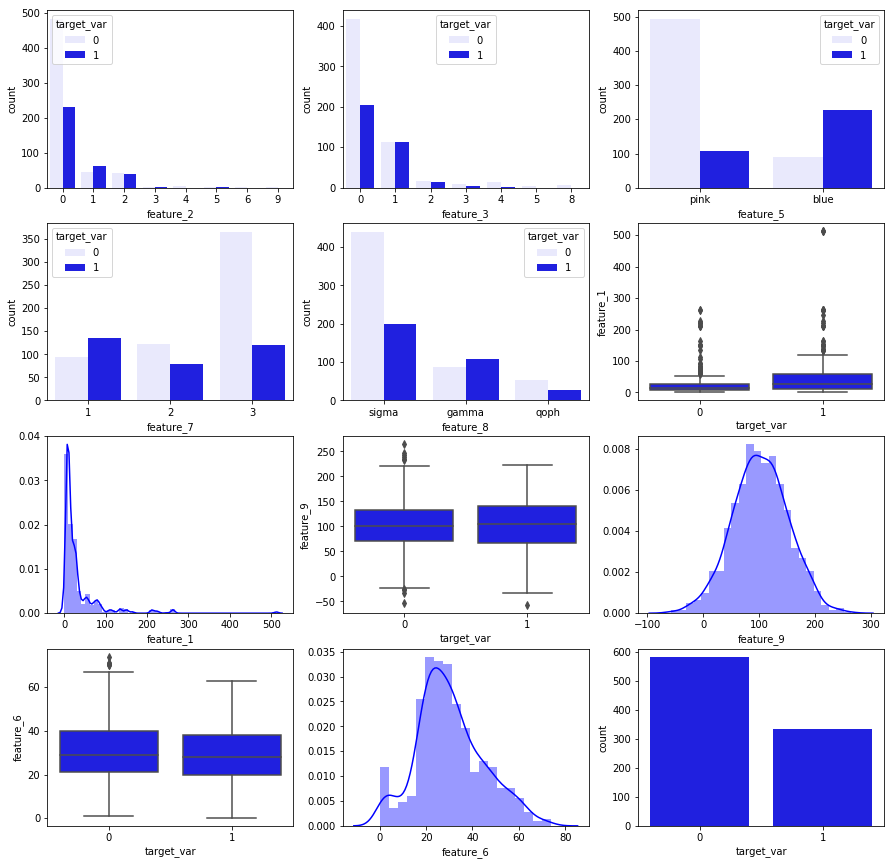

In [7]:
f,ax = plt.subplots(4,3,figsize=(15,15))
sns.countplot('feature_2',hue = 'target_var',data=train_data,ax=ax[0,0],color = 'b')
sns.countplot('feature_3',hue = 'target_var',data=train_data,ax=ax[0,1],color = 'b')
sns.countplot('feature_5',hue = 'target_var',data=train_data,ax=ax[0,2],color = 'b')
sns.countplot('feature_7',hue = 'target_var',data=train_data,ax=ax[1,0],color = 'b')
sns.countplot('feature_8',hue = 'target_var',data=train_data,ax=ax[1,1],color = 'b')
sns.boxplot(x='target_var',y='feature_1',data=train_data,ax=ax[1,2],color = 'b')
sns.distplot(train_data['feature_1'].dropna(),ax=ax[2,0],color = 'b')
sns.boxplot(x='target_var',y='feature_9',data=train_data,ax=ax[2,1],color = 'b')
sns.distplot(train_data['feature_9'].dropna(),ax=ax[2,2],color = 'b')

sns.boxplot(x='target_var',y='feature_6',data=train_data,ax=ax[3,0],color = 'b')
sns.distplot(train_data['feature_6'].dropna(),ax=ax[3,1],color = 'b')
sns.countplot('target_var',data=train_data,ax=ax[3,2],color='b')

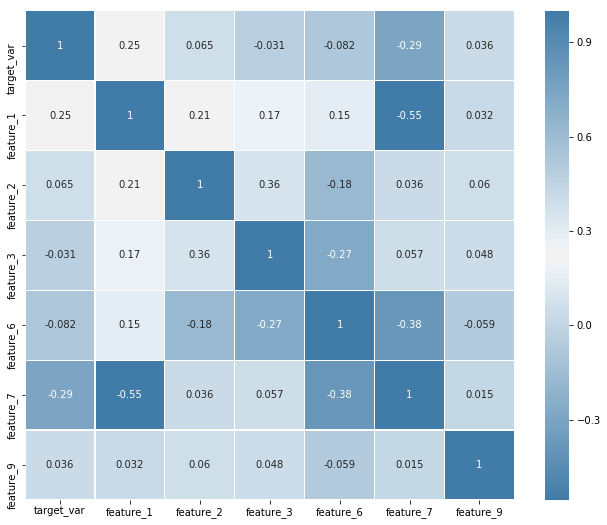

In [8]:
# Compute the correlation matrix
corr = train_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 240, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
drop_elements = ['feature_4','feature_5','feature_8']

df_ammend = train_data.drop(drop_elements, axis = 1)
sns.heatmap(df_ammend.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap,annot=True, linecolor='white')

From the above graphs and heatmap a number of observations may be made:
1. feature_1 has a number of outliers.  This is something which won't be addressed in this investigation, but which may be 
   addressed in future in order to attempt to improve the accuracy.
2. The target_var is averagely correlated to feature_7 and feature_1.  It is important to note that feauture_1 and feature_7 are    quite strongly correlated.
3. A number of features have been omitted on the heatmap and have missing values.  These values will need to be estimated or 
   omitted.  Certain features' values may also be categorised.
4. feature_1 is heavily skewed.
5. The ratio of 0 to 1 for the target_var reduces as feature_3 increases.
6. feature_9 is normally distributed around 100.
7. For feature 7, a large portion of values with 3 resulted in a predominantly 0 outcome for the target_var.

## 2. Data wrangeling

For the data wrangeling portion of this assignment it was decided to first address the features with missing values.  Once the missing values had been addressed (through either of the 5 below mentioned methods), attempts to categorise the data were explored.

### 2.1. 'Feature_1' missing data

Method 1: Replace mssing variable with mode/median/mean

In [9]:
#df_Mode = mode(train_data.feature_1)
df_Mean =train_data.feature_1[~np.isnan(train_data.feature_1)].mean()
df_Median = median(train_data.feature_1)
print("Mean: ",df_Mean," ","Median: ",df_Median," ")

df_Mean_Change = train_data['feature_1'].replace(np.NaN, train_data['feature_1'].mean())  #Initially I will use the mean

df_Median_Change = df['feature_1'].replace(np.NaN, df_Median) #I have saved median and mode as an alternative to improve model

#df_Mode_Change = train_data['feature_1'].replace(np.NaN, df_Mode)

Mean:  33.281379890710355   Median:  10.5  


Method 2: Delete the row with the missing value

In [10]:
#NaN_Index = (np.argwhere(np.isnan(train_data['feature_1'])))
#df_Drop_Row = train_data.drop(train_data.index[NaN_Index][0])
#df_Drop_Row.shape  #If the mean, median, or mode does not give a better accuracy a dataframe with the deleted row will be used.

Mehtod 3,4, and 5: Predict the values or assign categories

In this particular case Method 3 will not be considered.  The reason for this is that we are dealing with integers, where either of the two aforementioned methods, or Method 4 should provide greater accuracy.  Due to the complexity of Method 5, it will be assumed that the prediction will provide little to a negligible amount of value.  Method 3 is explored below.  In this method linear regression will be used to predict the missing values.

### 2.2. 'Feature_4' missing data

This is a particularly interesting feature since it contains both text and numerical values.  Also 77% of its values are blank.  The big questions therefore are: Should the entire feature be ommitted?  If not ommitted, how can the issue of blank values be addressed?  It was decided to split the text from the integers in this feature and create a feature_4A, which contains the text portion, and a feature_4B which contains the integers from the orginal feature_4.



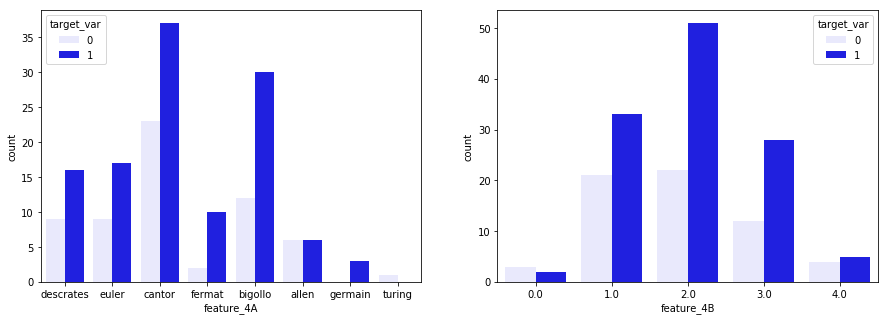

In [11]:
df_feature_4_Pre = train_data.dropna()
df_feature_4_Pre.reset_index(drop=True,inplace=True)
df_feature_4_Pre.head(30)
df_feature_4 = pd.DataFrame(df_feature_4_Pre.feature_4.str.split('-',1).tolist(),columns = ['feature_4A','feature_4B'])
df_feature_4_combine = pd.concat([df_feature_4_Pre, df_feature_4], axis=1)
df_feature_4_combine
df_feature_4_whole = df_feature_4_combine.convert_objects(convert_numeric=True)

df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>=1) & (df_feature_4_whole['feature_4B']<=40),'feature_4B']= 1
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>40) & (df_feature_4_whole['feature_4B']<=80),'feature_4B']= 2
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>80) & (df_feature_4_whole['feature_4B']<=120),'feature_4B']= 3
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>120) & (df_feature_4_whole['feature_4B']<=180),'feature_4B']= 4
df_feature_4B = df_feature_4_whole.feature_4B.fillna(0)
df_feature_4_whole.feature_4B = df_feature_4B

f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('feature_4A',hue = 'target_var',data=df_feature_4_whole,ax=ax[0],color = 'b')
sns.countplot('feature_4B',hue = 'target_var',data=df_feature_4_whole,ax=ax[1],color = 'b')




In [12]:
df_feature_4_whole.head(10)

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_4A,feature_4B
0,1,76.7292,0,1,descrates-44,blue,49.0,1,gamma,206.546035,descrates,2.0
1,1,13.0000,0,0,descrates-67,pink,34.0,2,sigma,158.107495,descrates,2.0
2,0,26.5500,0,0,euler-49,pink,65.0,1,sigma,62.299786,euler,2.0
3,1,55.4417,0,1,cantor-127,blue,43.0,1,gamma,144.870167,cantor,4.0
4,1,211.5000,1,1,cantor-91,blue,50.0,1,gamma,77.046700,cantor,3.0
5,1,10.5000,0,0,fermat-44,blue,22.0,2,sigma,139.725579,fermat,2.0
6,0,71.0000,1,1,bigollo-33,pink,70.0,1,sigma,62.301860,bigollo,1.0
7,0,38.5000,0,0,euler-74,pink,47.0,1,sigma,165.150500,euler,2.0
8,0,79.2000,0,0,bigollo-97,pink,24.0,1,gamma,115.303572,bigollo,3.0
9,1,136.7792,0,1,cantor-100,blue,26.0,1,gamma,183.130062,cantor,3.0


In the above two graphs the first represent feature_4B which is the text portion of the original feature_4. Based, simply by looking at the graph it appears as though the variation in feature_4A (from allen to germain) has very little effect on the binary outcome.  Similarly with feature_4B.  feature_4B was categorised into five potentional values.  This was done by splitting the distribution of numbers into roughly five bins.  Shown below are the calculation which were done to determine whether or not the individual distributions have a strong direct impact on the binary outcome of the target variable. 

In [13]:
for i in range(1,5):
    Total = (df_feature_4_whole[(df_feature_4_whole.feature_4B == i)].sum()[11])/i
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4B == i) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(i,": ",Relation,"%")

1 :  61.111111111111114 %
2 :  69.86301369863014 %
3 :  70.0 %
4 :  55.55555555555556 %


In [14]:
Word_cat = ["allen","bigollo", "cantor", "descrates","euler","fermat","germain","turing"]
for x in Word_cat:
    Total = df_feature_4_whole.feature_4A.str.count(x).sum()
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4A ==x) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(x,": ", Relation,"%")

allen :  50.0 %
bigollo :  71.42857142857143 %
cantor :  61.66666666666667 %
descrates :  64.0 %
euler :  65.38461538461539 %
fermat :  83.33333333333334 %
germain :  100.0 %
turing :  0.0 %


From the above graphs and calculations it is clear that there is not strong correlation between the individual values of feature_4A and feature_4B.  It was therefore decided to simply indicate whether or not feature_4 had a value or not, and then determine whether this had an effect on the binary outcome.  This was done below.

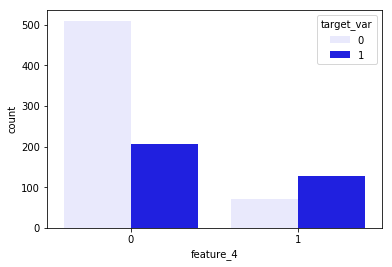

In [15]:
train_data.feature_1 = df_Mean_Change
train_data.feature_4 = train_data.feature_4.fillna(0)
train_data = train_data.reset_index()
#train_data.loc[(train_data.feature_4!=0)]=1
for x in range(0,len(train_data)):
 if train_data.feature_4[x]!=0:
    train_data.feature_4[x] = 1
    
sns.countplot('feature_4',hue = 'target_var',data=train_data,color = 'b')


From the above figure it is clear that there is a significant relationship between what the binary outcome is, and whether or not feature_4 has a value.  

### 2.3 'Feature_6' missing data

For feature_6 the rows with missing values were deleted.  This was done, as opposed to selection the median/mean/mode due to the large number of missing values.  If median/mean/mode had been selected it was assumed, and will be shown, that it would have greatly biased the data.

90.0
155.0
168.0
156.0
167.0


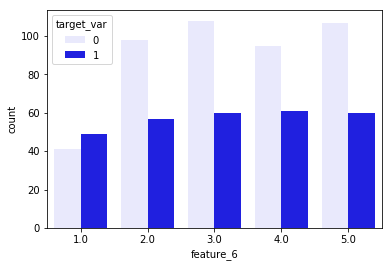

In [16]:
NaN_Index = np.isnan(train_data['feature_6'])
train_data =  train_data.drop(train_data.index[NaN_Index])
train_data.reset_index()
A = train_data.feature_6
A.loc[(A>0.1) & (A<=16)] = 1
A.loc[(A>16) & (A<=23)] = 2
A.loc[(A>23) & (A<=30)] = 3
A.loc[(A>30) & (A<=40)] = 4
A.loc[(A>40)] = 5

train_data.feature_6 = A

for i in range(1,6):
    print(train_data[(train_data.feature_6 ==i)].sum()[7]/i)

sns.countplot('feature_6',hue = 'target_var',data=train_data,color = 'b')

### 2.4. 'Feature 1' categorising

As previously observed the data for feature 1 is quite skewed.  As a result it was decided to split the values into three numerica categories 1 when values are betwee 0-9, 2 when values are between 9-25, and 3 when values are greater than 25.

212.0
218.0
306.0


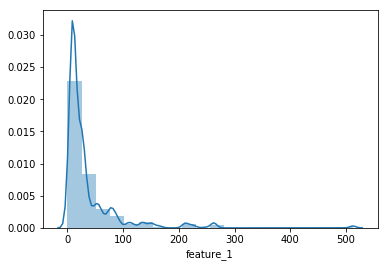

In [17]:
sns.distplot(train_data.feature_1,hist=True,bins=20)
train_data

B = train_data.feature_1

B.loc[(B>=0) & (B<=9)] = 1
B.loc[(B>9) & (B<=25)] = 2
B.loc[(B>25)] = 3
train_data.feature_1 = B

for i in range(1,4):
    Section = train_data[(train_data.feature_1 ==i)].sum()[2]/i
    print(Section)


### 2.5. 'Feature 5' categorising

For feature_5, pink and blue were simply given numeric values of 1 and 2.  

In [18]:
NaN_Index = np.isnan(train_data['feature_1'])
train_data =  train_data.drop(train_data.index[NaN_Index])
train_data.reset_index()
C = train_data.feature_5
C.loc[(C=="pink")] = 0
C.loc[(C=="blue")] = 1


train_data.feature_5 = C
train_data.shape

(736, 11)

### 2.6. 'Feature 8' categorising

In [19]:
D = train_data.feature_8
D.loc[(D=="sigma")] = 1
D.loc[(D=="gamma")] = 2
D.loc[(D=="qoph")] = 3

train_data.feature_8 = D

### 2.7. 'Feature 2 and 3' categorising

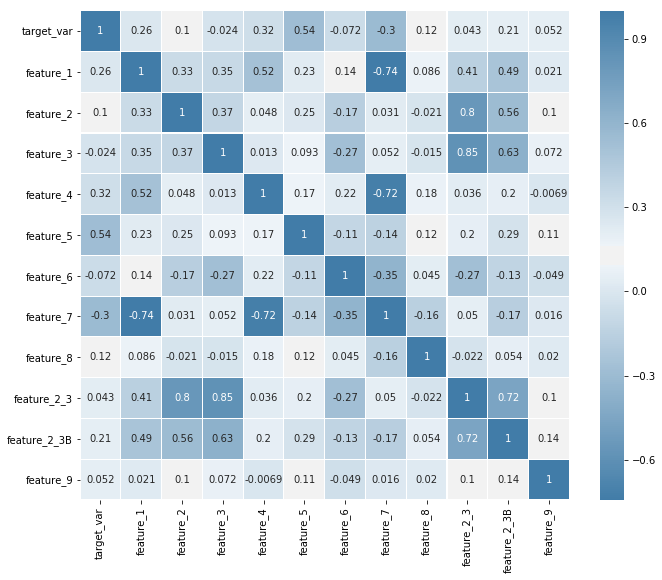

In [20]:
train_data = train_data.reset_index()
train_data = train_data.drop('index',axis=1)
train_data = train_data.drop('level_0',axis=1)

train_data = train_data.reset_index()
train_data = train_data.drop('index',axis=1)
train_data.insert(9,'feature_2_3',0)
train_data.insert(10,'feature_2_3B',0)


for x in range(0,len(train_data)):
 if [(train_data.feature_2[x]!=0) & (train_data.feature_3!= 0)]:   
    train_data.feature_2_3[x] = train_data['feature_2'][x] + train_data['feature_3'][x]
    
for x in range(0,len(train_data)):
 if (train_data.feature_2_3[x]!=0):
    train_data.feature_2_3B[x] = 1
    
# Compute the correlation matrix
corr = train_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 240, as_cmap=True)

df_ammend = train_data
sns.heatmap(df_ammend.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap,annot=True, linecolor='white')

In [22]:
train_data = train_data.dropna()
train_data = train_data.reset_index()
X_train = train_data.drop("target_var", axis=1)
Y_train = train_data["target_var"]

from sklearn.cross_validation import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=110)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log



80.54

In [23]:
start = timeit.default_timer()

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
print(acc_gaussian)

stop = timeit.default_timer()

print('Time: ', stop - start) 

79.19
Time:  0.0036352805598848983


In [24]:
start = timeit.default_timer()

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
print(acc_linear_svc)

stop = timeit.default_timer()

print('Time: ', stop - start) 

76.02
Time:  0.03748593333910427


In [25]:
start = timeit.default_timer()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred7 = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree)


stop = timeit.default_timer()

print('Time: ', stop - start) 

73.76
Time:  0.004463998168616146


In [26]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=8, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print(acc_knn)

60.63


In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)


Text(0,0.5,'Accuracy [%]')

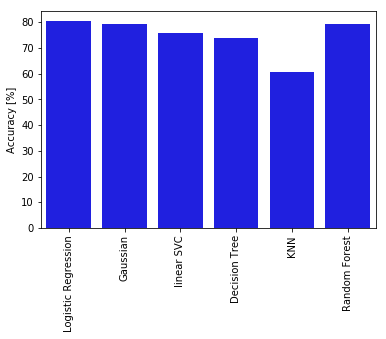

In [28]:
objects = ('Logistic Regression', 'Gaussian', 'linear SVC', 'Decision Tree', 'KNN', 'Random Forest')
x_pos = np.arange(len(objects))
Model_Results = [acc_log, acc_gaussian, acc_linear_svc, acc_decision_tree, acc_knn, acc_random_forest]
    
sns.barplot(x_pos, Model_Results,color='b')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy [%]')

Text(0.5,0,'Mean Accuracy')

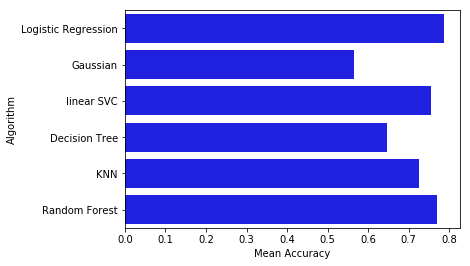

In [29]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=15)
# Modeling step Test differents algorithms 
random_state = 2

classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression', 'Gaussian', 'linear SVC', 'Decision Tree', 'KNN', 'Random Forest']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, color='b')
g.set_xlabel("Mean Accuracy")

In [32]:
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

ModuleNotFoundError: No module named 'keras'